# Question 1

Suppose that you are conducting a scientific experiment where you are observing the effects of one
variable (x_train.npy and x_test.npy) on the output (y_train.npy and y_test.npy).

<br>

Your goal is to come up with a linear regression model that can take the training data (x_train.npy and
y_train.npy) and model the relationship between the variables x and y. You should implement your
own version of linear regression either using gradient descent or normal equations. You SHOULD
NOT use any pre-packaged library such as Sci-Kit Learn.

MSE on Training Data: 172822.60339569926
MSE on Test Data: 281061.3273449853


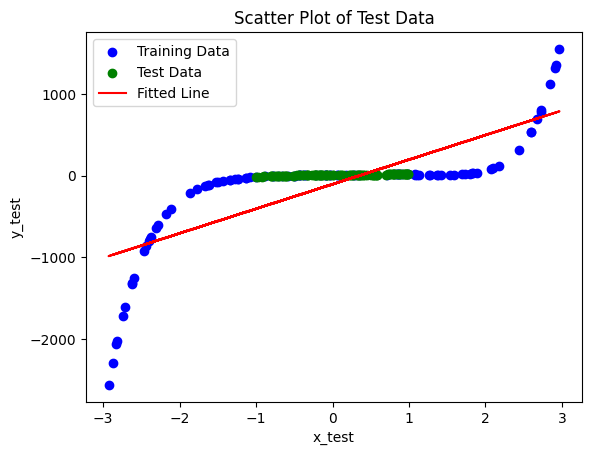

MSE on Training Data (Polynomial): 18317.069254431426
MSE on Test Data (Polynomial): 7759.782697645273


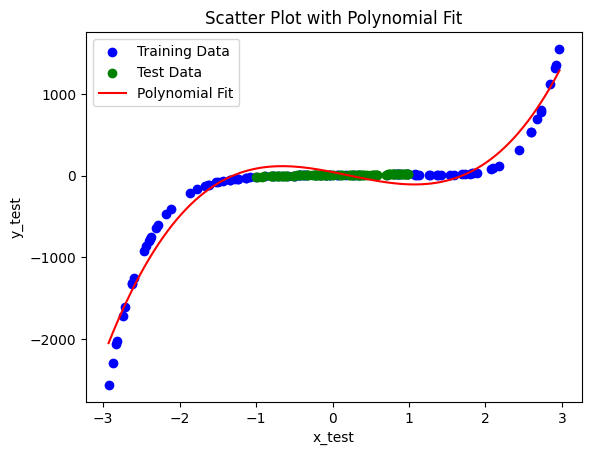

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def mse(true_values, predicted_values):
    return np.mean((true_values - predicted_values) ** 2)


def poly_features(X, degree):
    out = X.copy()
    for i in range(2, degree + 1):
        out = np.c_[out, X ** i]
    return out


# Load in training data from google drive.

# xtrain = np.load('/content/drive/MyDrive/COMP-5630/x_train.npy')
# ytrain = np.load('/content/drive/MyDrive/COMP-5630/y_train.npy')

# Load in training data locally.

xtrain = np.load('x_train.npy')
ytrain = np.load('y_train.npy')


# Load in test data from google drive.
# xtest = np.load('/content/drive/MyDrive/COMP-5630/x_test.npy')
# ytest = np.load('/content/drive/MyDrive/COMP-5630/y_test.npy')

# Load in test data locally.
xtest = np.load('x_test.npy')
ytest = np.load('y_test.npy')

# Add the column of ones
# According to numpy docs, '.c_' functions are used to
# translate slice objects to concatenation along the second axis.
X = np.c_[np.ones(xtrain.shape[0]), xtrain]

# Apply the normal equation to find the optimal parameters
# The product of the inverse of X transposed multiplied by X,
# and X transposed multiplied by the vector ytrain
theta_vals = np.linalg.inv(X.T @ X) @ X.T @ ytrain


# Since we added the first column of 1s, doing matrix multiplication
# with the X matrix and the vector containing Theta_0 (bias or y-intercept)
# and Theta_1 (slope or weight).
ypred = X @ theta_vals


# Generate mse values.
mse_train = mse(ytrain, ypred)
mse_test = mse(ytest, ypred)

print("MSE on Training Data:", mse_train)
print("MSE on Test Data:", mse_test)


# Generate a graph containing the test data, training data, and the linear
# fitted line based on the predictions that utilize the theta values.
plt.scatter(xtrain, ytrain, color='blue', label='Training Data')
plt.scatter(xtest, ytest, color='green', label='Test Data')
plt.plot(xtrain, ypred, color='red', label='Fitted Line')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('Scatter Plot of Test Data')
plt.legend()
plt.show()


######################################################################
# *The xtrain and xtest features are run through the poly function.* #
######################################################################


# Generate polynomial features for the normalized data.
# Degree three will make it a cubic function.
xtrain_poly = poly_features(xtrain, 3)
xtest_poly = poly_features(xtest, 3)


# Add bias term (column of ones).
X_poly = np.c_[np.ones(xtrain_poly.shape[0]), xtrain_poly]

# Fit using normal equation.
theta_poly = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ ytrain

# Make predictions on the y values, and adjust the x values for bias.
ypred_poly_train = X_poly @ theta_poly
X_poly_test = np.c_[np.ones(xtest_poly.shape[0]), xtest_poly]
ypred_poly_test = X_poly_test @ theta_poly


# Calculate MSE for the training and test sets
mse_train_poly = mse(ytrain, ypred_poly_train)
mse_test_poly = mse(ytest, ypred_poly_test)

print("MSE on Training Data (Polynomial):", mse_train_poly)
print("MSE on Test Data (Polynomial):", mse_test_poly)

# Generate a graph containing the test data, training data, and the polynomial
# fitted line based on the predictions that utilize the theta values.
# The purpose of '.linspace' is to return evenly spaced values over an interval.
x_plot = np.linspace(min(xtrain), max(xtrain), 100)
x_plot_poly = poly_features(x_plot, 3)
X_plot_poly = np.c_[np.ones(x_plot_poly.shape[0]), x_plot_poly]
y_plot = X_plot_poly @ theta_poly

# Plotting initial cubic function
plt.scatter(xtrain, ytrain, color='blue', label='Training Data')
plt.scatter(xtest, ytest, color='green', label='Test Data')
plt.plot(x_plot, y_plot, color='red', label='Polynomial Fit')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('Scatter Plot with Polynomial Fit')
plt.legend()
plt.show()



# Question 1 Report

<br>

### a) What kind of relationship exists between the variables (linear, non-linear, or something else)?

<br>
The relationship that exists here between the two variables is most definitely nonlinear, as the graph of the training data most closely represents the sigmoid function. As you can see by the calculated Mean Squared Error (MSE), which is large even by the standards of the range of the training data, a linear representation realistically is not the best choice in this situation, due to the fact that it is indeed a nonlinear relationship.

<br>

### b) Does the current model need improvements to capture the observed relationship effectively?
- If so, what modifications would you suggest to better capture the data pattern?
- What types of transformations or additional features might improve the model's performance?
After implementing these changes, how does each new feature or transformation impact the fit of the model?
Plot and analyze them individually to assess the impact.

<br>

The current model would absolutely benefit from adding in polynomial features, as from the look of it, the graph most closesly represents a cubic function. Perhaps creating a function that manually adds higher degree terms for the input features could generate a line that better fits the graph data. I demonstrated this above, where you can see from both the graph as well as the updated MSE that the new line is a significantly better fit. The transformation that took place essentially shows a far more fitting relationship in terms of how the two variables impact eachother. The relationship as x increases clearly shows a trend resembling a cubic function for the training data, with the data between the relative minima and maxima also somewhat covering the test data as well. Overall, the impact displayed is tremendous, which with more data can undoubtedly be refined such that it is an optimal fit.
<br>
<br>

# Report

<br>

To break down the code line by line, lets start with the beginning, where the program begins by first defining two functions to be used throughout- the Mean Squared Error function, which simply is a helper function to quick implement the computation of the total MSE for the data at each point, as well as the polynomial adjustment function, which first creates a copy of the design Matrix, X, and then iterates from degree 2 to the inputed end polynomial degree, adding those columns for the values adjusted.

<br>

After these helper functions, we load in the data from the 4 different sets of input  files, and then proceed to create the design matrix using the training data, with a column of all 1s appended to the front for accounting for the y-intercept or bias in the next step. Next, we compute the vector of theta values, the y-intercept/bias and the slope/weight, using the normal equation. After computing this optimal theta vector, we will create a new set of y  values that are the predicted values, calculated by taking the dot product of X and the  theta values, which will equate to the predicted values as if they were put through y=mx+b and stored into a matrix. Following this, we compute the MSE for both sets of data and print those out, then proceeding to graph the calculated data - thus producing the first graph with the linear representation.

<br>

In the improvement section, we take a slightly altered approach in implementing the normal equation, regenerating both sets of x data using the polynomial function previously created, with the goal of creating a cubic function to better fit the data. We do this by now recreating the design matrix with the updated data, and then calculating the normal equation once again. With these theta values we can now generate the updated predicted y values, and then calculate the new MSE. To graph the values accurately with the adjustments made, we then need to create a new array called x_plot containing 100 evenly spaced values between the min and maximum x values provided in xtrain. The purpose of this range of values is to plot the new polynomial with the smoothest fit that we can get over the range of already plotted training data. With a more dense set of evenly space3d values, we can compute and plot the corresponding y values in order to generate a smooth curve - thus more accurately representing the data. Once generated, we can then finish by plotting the test and train data, with the polynomial line fitting the data as shown in the output.

<br>

# Question 2

Imagine that you are a realtor in Auburn. You have data points (See excel file. Last column is the
target variable.) that correspond to the recent sales of different houses in and around Auburn. Your
goal is to help estimate the prices of houses that one can use to sell or buy listings. Can you use your
knowledge of linear regression to find the best regression model? Use your implementation from
Question 1 (without any basis functions) to answer the following questions.
1. What is the average least squares error for the given data using your simple linear regression
model?
2. Which feature has the greatest impact on the predicted house prices? How can you justify
this finding? Could this feature alone serve as a predictor for house prices?
3. Which feature has the least impact on the predicted house prices? How can you verify
this? What is the impact on model performance when this feature is removed from the
dataset?

In [3]:
import numpy as np
import pandas as pd


# Mean Squared Error calculation function.
def mse(true_values, predicted_values):
    return np.mean((true_values - predicted_values) ** 2)

def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Loading in the housing data from google drive.
# house_data = pd.read_excel('/content/drive/MyDrive/COMP-5630/Housing_data_regression.xlsx')

# Loading in the housing data locally.
house_data = pd.read_excel('Housing_data_regression.xlsx')

features = house_data.columns[1:-1]
print("Features:", features)
print('\n')

# Store the target values from the price column.
y_targets = house_data['Price'].values

# Store the design matrix of the features with the added 1s column.
X_feature = house_data[features].values

X_feature = np.c_[np.ones(X_feature.shape[0]), X_feature]



# Calculate the theta values for each feature using normal equation.
theta_vals = normal_equation(X_feature, y_targets)

# Utilize these theta vals to predict y values with the regression model.
y_pred = X_feature @ theta_vals


# Calculate the MSE to find the average least squares error.
mse_val = mse(y_targets, y_pred)
print("Average Least Squares Error:", mse_val)


# By taking the absolute value of all of the theta values,
 # (aside form the 1s column), we can accurately
feat_impact = np.abs(theta_vals[1:])
most_impactful = np.argmax(feat_impact)
least_impactful = np.argmin(feat_impact)

print("Feature with most impact:", features[most_impactful])
print("Feature with least impact:", features[least_impactful])
print('\n')

###########################################################
#        Retrain model with only this feature.            #
###########################################################

top_feature = house_data[features[most_impactful]].values

top_feature = np.c_[np.ones(top_feature.shape[0]), top_feature]

top_theta = normal_equation(top_feature, y_targets)

top_ypred = top_feature @ top_theta

top_mse = mse(y_targets, top_ypred)
print("Top Feature Only Most Squares Error:", top_mse)
print('\n')



###########################################################
#     Retrain model without least impactful feature.      #
###########################################################

# Drop the least impactful feature.
updated_features = features.drop(features[least_impactful])

# Create an updated design matrix without the least impactful feature.
updated_X = house_data[updated_features].values
updated_X= np.c_[np.ones(updated_X.shape[0]), updated_X]

# Calculate the new optimal params using the normal equation.
updated_theta = normal_equation(updated_X, y_targets)

updated_ypred = updated_X @ updated_theta

updated_mse = mse(y_targets, updated_ypred)
print("New Average Least Squares Error:", updated_mse)


feat_impact_updated = np.abs(updated_theta[1:])
most_impactful_updated = np.argmax(feat_impact_updated)
least_impactful_updated = np.argmin(feat_impact_updated)

print("Updated Feature with most impact:", updated_features[most_impactful_updated])
print("Updated Feature with least impact:", updated_features[least_impactful_updated])
print('\n')

house_data.head(20)













Features: Index(['Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms',
       '# Bedrooms', 'Age of home'],
      dtype='object')


Average Least Squares Error: 5006561505.204386
Feature with most impact: Living area
Feature with least impact: Age of home


Top Feature Only Most Squares Error: 12282616798.302181


New Average Least Squares Error: 5318026012.19803
Updated Feature with most impact: Bathrooms
Updated Feature with least impact: Land Area




,House ID,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Price
0,1,1.0,3.4720,0.998,1.0,7,4,42,491760.0
1,2,1.0,3.5310,1.500,2.0,7,4,62,502080.0
2,3,1.0,2.2750,1.175,1.0,6,3,40,454290.0
3,4,1.0,4.0500,1.232,1.0,6,3,54,455730.0
4,5,1.0,4.4550,1.121,1.0,6,3,42,505970.0
5,6,1.0,4.4550,0.988,1.0,6,3,56,389100.0
6,7,1.0,5.8500,1.240,1.0,7,3,51,589800.0
7,8,1.0,9.5200,1.501,0.0,6,3,32,560390.0
8,9,2.5,9.8000,3.420,2.0,10,5,42,1642020.0
9,10,2.5,12.8000,3.000,2.0,9,5,14,1445980.0


# Question 2 Report

Regarding the approach and thought process I had for this question, the first thing I did was import the data from the spreadsheet, and print the head of the dataframe to nicely show each row and its corresponding column data. From here I was able to build a solid understanding of what the raw data looked like, and how I could break it up to be manipulated.

<br/>

Next, I began to separate the data in an organized matter in order to accomplish the goal. I first took just the final column of the table to isolate the 'target values', or what we are looking for the true outcome to be. With the same intuition, I also created an array called features in order to isolate the specific features from the column containing the index values, as well as from the target value column. From here I determined I was ready to move forward with creating the linear regression using the normal equation.

<br/>

This time around, I decided to make my life a little easier by creating a short function called normal_equation(X, y), where the input parameter X would be the design matrix for the features, and y would be the target values. Through this calculation the theta optimized values are produced, allowing us to continue to produce prediction values given the data. Upon calculating prediction values, we can then calculate the initial MSE, which proved to be a large value, (over 5 billion).

<br/>

In order to attempt to refine the model with a goal of decreasing the error and increasing the likelihood for an accurate prediction, we identify the most impactful feature, which would have the largest correlation / weight value, (from our theta optimized calculations), as well as the least impactful feature, which would have the smallest correlation / weight value. Upon identifying these, we can drop the least impactful feature column from consideration and recalculate the theta values as well as the predicted y, in order to find a new MSE.


<br />

Interestingly enough, removing the least impactful feature resulted in a larger MSE, which normally would seem to indicate the removal of a more impactful feature; however the increase did not seem to be absurdly large, so it is possible that the feature really did not have as big of an impact, or that the method of calculation could use some refining.


## Sub-questions:

1. The Average least squares error for the given data using the simple linear regression model came out to 5006561505.204384, which did in fact seem quite large to begin with. However, when taking into account that these values being considered for price are in the hundreds of thousands, (Ranging anywhere from the \$390,000-$1,640,000 range), the squaring of some of these value differences seem far more understandable.

<br />

2. The feature that served as the most impactful after the first attempt, was the living area. We were able to verify this by identifying its correlation / weight value to be the largest amongst all features. Upon calculating what the MSE would be with only this feature in consideration, the value was significantly higher than that of the model considering all features, indicating that this model could not be represented accurately with only the one feature.

<br />

3. The feature that served as teh least impactful after the first attempt was the age of the home. This was indicated by it having the smallest correlation / weight value calculated, meaning that computationally speaking it has the smallest impact on the predicted price value that was outputted. Upon recalculating the results with this feature removed, it was found that oddly enough the MSE increased slightly, (in comparison to the trial that only included the single feature), indicating that this feature does in fact play a relatively minimal role in the impact of these features on house prices.

# Question 3

Suppose you are working on a binary classification problem where you are tasked with predicting whether a certain type of tumor is malignant (y = 1) or benign (y = 0) based on a set of features. You are given a dataset that includes these features and corresponding labels for training.

<br>

Your goal is to implement a logistic regression model from scratch (without using any pre-packaged libraries such as Sci-Kit Learn) to classify the tumors. You should use gradient descent to find the optimal parameters that minimize the cost function. Here are some tasks to guide you through this problem: [Code Implementation 11 points]

<br/>

1. Implement the Sigmoid Function: Write the code for the sigmoid function that will map your
predictions to probabilities.

<br/>

2. Derive the Cost Function: Formulate the cost function for logistic regression and explain why it is different from the cost function in linear regression.

<br/>

3. Apply Gradient Descent: Implement the gradient descent algorithm to minimize the cost function and optimize the parameters of your model. Ensure that you include a stopping
criterion based on either a fixed number of iterations or a threshold for changes in the cost function.

<br/>

4. Evaluate the Model: Once the model is trained, evaluate its performance on a test dataset. Plot the decision boundary and explain how the logistic regression model separates the two classes.

<br>

### Answer the following questions: [9 points]
1. Why is the sigmoid function critical in logistic regression? How does it influence the interpretation of the output?

<br/>

2. What are the key differences between the logistic regression model and the linear regression model, particularly in the context of the cost function and the type of problem each is used for?

<br/>

3. How would you modify your logistic regression model to handle multi-class classification problems?

Iteration 0: Cost = 0.3159
Iteration 100: Cost = 0.0928
Iteration 200: Cost = 0.0922
Iteration 300: Cost = 0.0920
Iteration 400: Cost = 0.0919
Iteration 500: Cost = 0.0917
Iteration 600: Cost = 0.0916
Iteration 700: Cost = 0.0914
Iteration 800: Cost = 0.0913
Iteration 900: Cost = 0.0912
Final parameters (thetas): [-0.04661327  0.16390289  0.10642447  0.01267293  0.02301378  0.00476592]
Final cost post training 0.09102418452540423


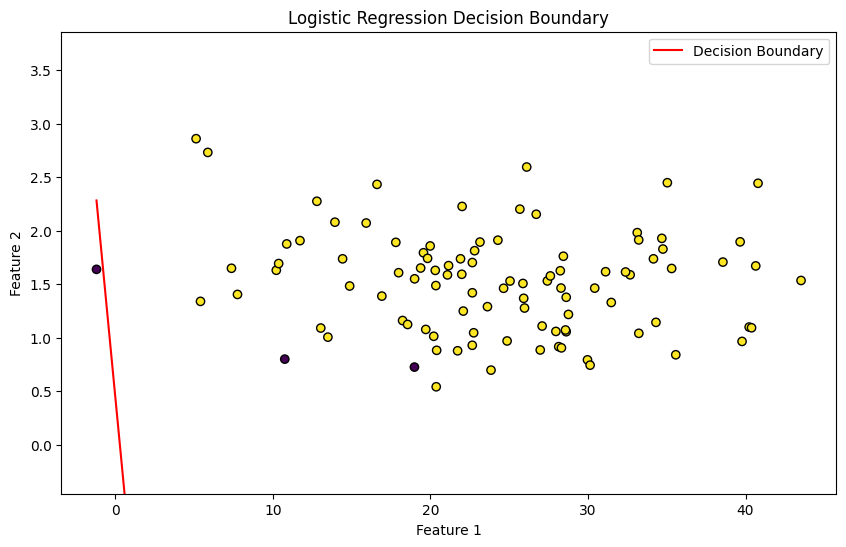

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Defines a sigmoid function to easily compute the mathematical value
# for the entire input matrix.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Defines a cost function calculator to easily reuse without having to rewrite
# the logic each time.
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1 / m) * (np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)))
    return cost

# Initializes theta to zeros for a better starting point
def theta_init(X):
    return np.zeros((X.shape[1], 1))

# Adds a column of ones to X for the bias term.
def adjustX(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

# Defines a function for calculating gradient descent to optimize theta.
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    costs = []

    for i in range(num_iterations):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * (X.T @ (h - y))
        theta -= learning_rate * gradient
        cost = cost_function(X, y, theta)
        costs.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return theta, costs

# Import the data from google drive.
# tumor_test = pd.read_csv('/content/drive/MyDrive/COMP-5630/Question3_Tumor_test_data.csv')
# tumor_train = pd.read_csv('/content/drive/MyDrive/COMP-5630/Question3_Tumor_train_data.csv')

# Import the data locally.
tumor_test = pd.read_csv('Question3_Tumor_test_data.csv')
tumor_train = pd.read_csv('Question3_Tumor_train_data.csv')

# Initialize parameters
learning_rate = 0.01
num_iterations = 1000

# Feature and label extraction
test_features = tumor_test.columns[:-1]
train_features = tumor_train.columns[:-1]

X_test = tumor_test[test_features].values
y_test = tumor_test['Malignancy (y)'].values

X_train = tumor_train[train_features].values
y_train = tumor_train['Malignancy (y)'].values

# Account for the bias term by adding a column of 1s.
X_test = adjustX(X_test)
X_train = adjustX(X_train)

# Initialize theta
curr_theta = theta_init(X_train)

# Train the model using gradient descent
curr_theta, costs = gradient_descent(X_train, y_train.reshape(-1, 1), curr_theta, learning_rate, num_iterations)

print('Final parameters (thetas):', curr_theta.flatten())
print('Final cost post training', costs[-1])

# Plotting decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 1], X_train[:, 2], c=y_train.flatten(), cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

x_vals = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
y_vals = -(curr_theta[0] + curr_theta[1] * x_vals) / curr_theta[2]
plt.plot(x_vals, y_vals, label='Decision Boundary', color='red')
plt.legend()
plt.title('Logistic Regression Decision Boundary')
# Adjusting y-axis limits
plt.ylim([X_train[:, 2].min() - 1, X_train[:, 2].max() + 1])
plt.show()

# Question 3 Report:

My intution going into this question was to try and organize each calculation into its own function, as I knew that gradient descent would involve iterations. At first, pulling and organizing the data for processing was simple, and resembled heavily what had been done in the last two questions. The difficult part, came wiht organizing the math in a way that was understandable within the gradient descent function, and then for the decision boundary calculation which I clearly was not able to do correctly. The gradient descent would at different points produce a very unclear matrix of theta values, which I initially attempted to populate with random values, but continued to run into issues. Eventually with the help of hours of research and viewing different examples of how others have implemented gradient descent, I was able to piece together what I feel is an example that at least scratches the surface through its ability to calculate the end values for the parameter vector, thus showing the affects of each feature, as well as displaying the trend in how the cost was changing as the script continued through each iteration.

<br>

I have a goal moving forward to better understand the nitty gritty of each piece of math being done here, and the reasoning behind it. I have began to do my own research to better understand each piece, however I think I may need to start fresh on a similar example to better gauge my understanding of how to properly apply gradient ascent from scratch.

1. The sigmoid function can be considered critical to lgoistic regression due to the fact that it maps the predictions to probabilities, which help to satisfy the criteria for a binary classification. Since the sigmoid function 'squashes' the data, and is able to effectively display the relationship in terms of approaching 1, 0, and 0.5, we can thus clearly see how the prediction should trend.

<br>

2. The key differences between linear and logistic regression are first and formost the outputs being evaluated, as linear regressions are utilized for continuous outputs, such as house prices, whereas logistic regression is used for binary classifications, where there is either one outcome or another, (1, 0). For a linear regression, the relationship is also modelled as a linear combination of input features, attempting to minimize the squared residuals for each point of data. For Logistic regression, however, the probability of class membership, (belonging to one group or the other), is modeled through a logistic function, which minimize the cost each iteration based on the log-likelihood.

<br>

3. After exploring possible ways to modify this regression to handle multiclass classification, I came across the usage of the softmax function, which can be used in place of the sigmoid function. In this case, each class would have its own regression formula, helping to predict a probability distribution over the several different class labels.

